In [9]:
import os
import cx_Oracle
import pandas as pd
import numpy as np
import pickle
from datetime import date,datetime
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV, cross_val_score 
import time
import matplotlib.pyplot as plt
from sklearn.utils import resample
import datetime

In [49]:
df = pd.read_pickle(r"C:\Users\aman.khatri91425\Desktop\HomeCredit\Bigdata\Common Maps KNN\Combined_Scores_mean_grid.pkl")
df.head()

,RISK_SCORE,PRED_SCORE,RISK_FSTQPD30,SKP_CREDIT_CASE,TIME_DECISION_DATE,LOGIT_RISK_SCORE,LOGIT_PRED_SCORE,COMB_SCORE,GRID_ID,MEAN_PRED_SCORE,LOGIT_MEAN_PRED_SCORE
0,0.015552,0.360097,1,223563879,2019-02-01,-4.147921,-0.574942,0.091999,500_00516_03339,0.358151,-0.583399
1,0.008774,0.362530,0,227958985,2019-03-08,-4.727113,-0.564398,0.061996,500_00516_03339,0.358151,-0.583399
2,0.027658,0.362530,0,228293719,2019-03-11,-3.559794,-0.564398,0.136930,500_00516_03339,0.358151,-0.583399
3,0.009394,0.350365,0,228450258,2019-03-12,-4.658277,-0.617435,0.062878,500_00516_03339,0.358151,-0.583399
4,0.010106,0.355231,0,230434344,2019-03-28,-4.584458,-0.596123,0.067136,500_00516_03339,0.358151,-0.583399


In [51]:
metric_auc_combined = metrics.roc_auc_score(df["RISK_FSTQPD30"], df["COMB_SCORE"])
metric_auc_knn = metrics.roc_auc_score(df["RISK_FSTQPD30"], df["PRED_SCORE"])
metric_auc_mean_knn = metrics.roc_auc_score(df["RISK_FSTQPD30"], df["MEAN_PRED_SCORE"])
metric_auc_hc = metrics.roc_auc_score(df["RISK_FSTQPD30"], df["RISK_SCORE"])

gini_combined = 2 * metric_auc_combined - 1
gini_knn = 2 * metric_auc_knn - 1
gini_mean_knn = 2 * metric_auc_mean_knn - 1
gini_hc = 2 * metric_auc_hc - 1

print("gini_combined:",'{:,.2%}'.format(gini_combined))
print("\ngini_knn:",'{:,.2%}'.format(gini_knn))
print("\ngini_mean_knn:",'{:,.2%}'.format(gini_mean_knn))
print("\ngini_hc:",'{:,.2%}'.format(gini_hc))

gini_combined: 27.18%

gini_knn: 11.76%

gini_mean_knn: 11.80%

gini_hc: 25.02%


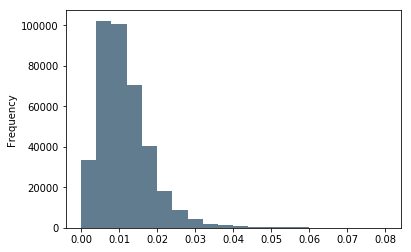

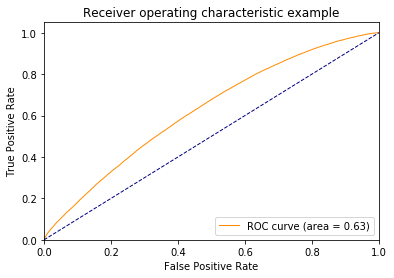

In [55]:
# Risk Score
pd.Series(df['RISK_SCORE']).plot.hist(bins=20, range=(0,0.08) ,color='#607c8e')


from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(df['RISK_FSTQPD30'].ravel(), df['RISK_SCORE'].ravel())
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 1
plt.plot(fpr, tpr, color='darkorange',         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

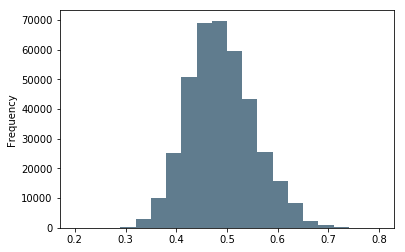

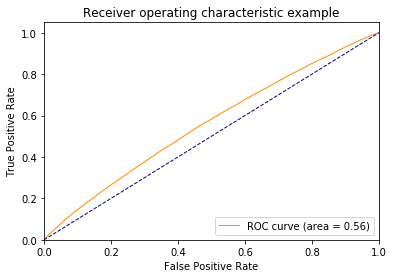

In [57]:
# KNN Score
pd.Series(df['PRED_SCORE']).plot.hist(bins=20, range=(0.2,0.8) ,color='#607c8e')

fpr, tpr, thresholds = roc_curve(df['RISK_FSTQPD30'].ravel(), df['PRED_SCORE'].ravel())
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 1
plt.plot(fpr, tpr, color='darkorange',         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

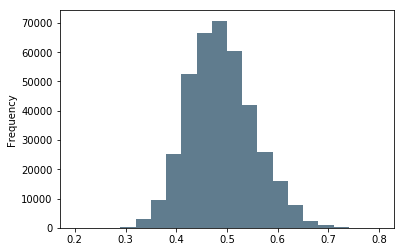

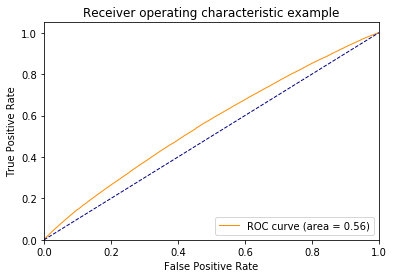

In [58]:
# Mean KNN Score
pd.Series(df['MEAN_PRED_SCORE']).plot.hist(bins=20, range=(0.2,0.8) ,color='#607c8e')

fpr, tpr, thresholds = roc_curve(df['RISK_FSTQPD30'].ravel(), df['MEAN_PRED_SCORE'].ravel())
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 1
plt.plot(fpr, tpr, color='darkorange',         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

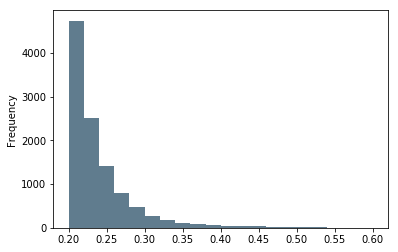

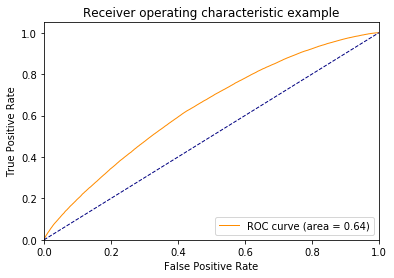

In [59]:
# Combined Score
pd.Series(df['COMB_SCORE']).plot.hist(bins=20, range=(0.2,0.6) ,color='#607c8e')

fpr, tpr, thresholds = roc_curve(df['RISK_FSTQPD30'].ravel(), df['COMB_SCORE'].ravel())
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 1
plt.plot(fpr, tpr, color='darkorange',         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#metrics calculation
cutoff=np.percentile(X_test['HC_SCORE'],95)
ypred=pd.Series(X_test['HC_SCORE']).apply(lambda x : 1 if x >cutoff else 0 )
#ypred=pd.Series(ypred_test).apply(lambda x : 1 if x > 0.48631722 else 0 )

print(confusion_matrix(y_test, ypred))
pd.Series(ypred_test).plot.hist(bins=10, rwidth=0.9 ,color='#607c8e')

print("\n Log Loss is :",log_loss(y_test, ypred_test))
print('Average precision-recall score: {0:0.2f}'.format(average_precision_score(y_test, ypred_test)))

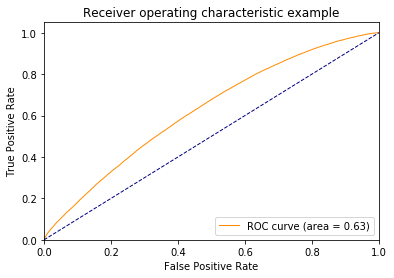

In [54]:
# Compute micro-average ROC curve and ROC area
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(df['RISK_FSTQPD30'].ravel(), df['RISK_SCORE'].ravel())
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 1
plt.plot(fpr, tpr, color='darkorange',         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()